In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
import os
import seaborn as sns

In [2]:
DAY_NIGHT_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
DAY_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_only_weather.csv"

day_night_solar_df = pd.read_csv(DAY_NIGHT_DATASET_PATH, sep=",", index_col=0)
day_night_solar_df = day_night_solar_df.iloc[:, :10]
print(day_night_solar_df.head())

X_day_night = day_night_solar_df.iloc[:, :-1].values
y_day_night = day_night_solar_df.iloc[:, -1].values

day_solar_df = pd.read_csv(DAY_DATASET_PATH, sep=",", index_col=1)
day_solar_df = day_solar_df.iloc[:, 1:]
day_solar_df = day_solar_df.iloc[:, :10]
print(day_solar_df.head())

X_day = day_solar_df.iloc[:, :-1].values
y_day = day_solar_df.iloc[:, -1].values

         Hour  Cloud coverage  Visibility  Temperature  Dew point   
Date                                                                
1/31/16    24             0.0        5.00         1.40       0.89  \
2/1/16      1             0.0        7.88         1.16       0.62   
2/1/16      2             0.0        9.84         1.22       0.96   
2/1/16      3             0.0        9.84         1.02       0.61   
2/1/16      4             0.0        9.88         0.83       0.45   

         Relative humidity  Wind speed  Station pressure  Altimeter   
Date                                                                  
1/31/16              95.56        9.00             29.10      29.89  \
2/1/16               91.04        7.04             29.11      29.90   
2/1/16               89.28        8.96             29.12      29.91   
2/1/16               89.12        6.36             29.14      29.93   
2/1/16               90.08        6.12             29.15      29.94   

         Solar ene

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

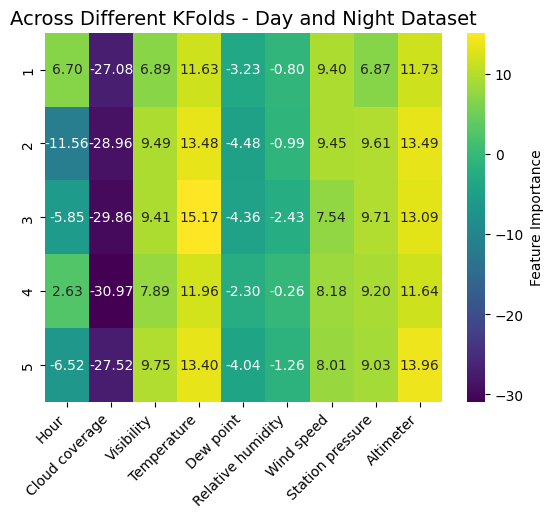

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

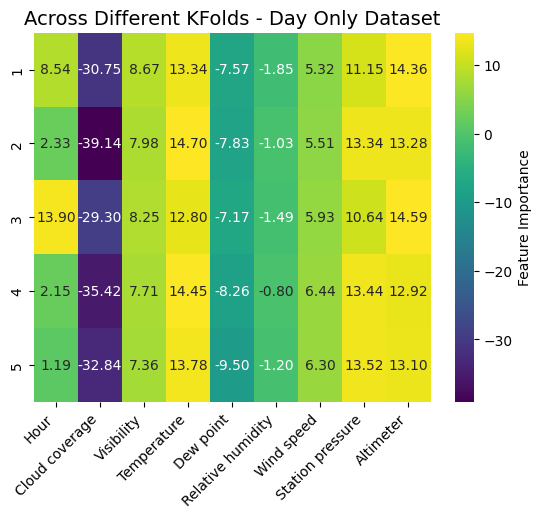

In [3]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

kf = KFold(n_splits=5, shuffle=True)

# Day and Night Dataset
best_mse_day_night = float('inf')
mse_values_day_night = []

feature_importance_day_night = np.zeros((5, X_day_night.shape[1]))

for fold, (train_index, val_index) in enumerate(kf.split(X_day_night, y_day_night)):
    X_train_fold, X_val_fold = X_day_night[train_index], X_day_night[val_index]
    y_train_fold, y_val_fold = y_day_night[train_index], y_day_night[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    # Record feature importance for this fold
    feature_importance_day_night[fold, :] = mlp_model.coefs_[0].sum(axis=1)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    mse_values_day_night.append(fold_mse)

    if fold_mse < best_mse_day_night:
        best_mse_day_night = fold_mse
        best_fold_day_night = fold

# Plot heatmap for feature importance
feature_names_day_night = day_night_solar_df.columns[:9].tolist()
sns.heatmap(feature_importance_day_night, annot=True, cmap='viridis', yticklabels=range(1, 6),
            xticklabels=feature_names_day_night, fmt='.2f', cbar_kws={'label': 'Feature Importance'})
plt.title('Across Different KFolds - Day and Night Dataset', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig(os.path.join(save_dir, 'day_night_feature_importance_heatmap.png'))
plt.show()

# Day Only Dataset
best_mse_day_only = float('inf')
mse_values_day_only = []

feature_importance_day_only = np.zeros((5, X_day.shape[1]))

for fold, (train_index, val_index) in enumerate(kf.split(X_day, y_day)):
    X_train_fold, X_val_fold = X_day[train_index], X_day[val_index]
    y_train_fold, y_val_fold = y_day[train_index], y_day[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    mlp_model.fit(X_train_fold, y_train_fold)

    # Record feature importance for this fold
    feature_importance_day_only[fold, :] = mlp_model.coefs_[0].sum(axis=1)

    val_predicted = mlp_model.predict(X_val_fold)

    fold_mse = np.mean((val_predicted - y_val_fold) ** 2)
    mse_values_day_only.append(fold_mse)

    if fold_mse < best_mse_day_only:
        best_mse_day_only = fold_mse
        best_fold_day_only = fold

# Plot heatmap for feature importance
feature_names_day_only = day_solar_df.columns[:9].tolist()
sns.heatmap(feature_importance_day_only, annot=True, cmap='viridis', yticklabels=range(1, 6),
            xticklabels=feature_names_day_only, fmt='.2f', cbar_kws={'label': 'Feature Importance'})
plt.title('Across Different KFolds - Day Only Dataset', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.savefig(os.path.join(save_dir, 'day_only_feature_importance_heatmap.png'))
plt.show()


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


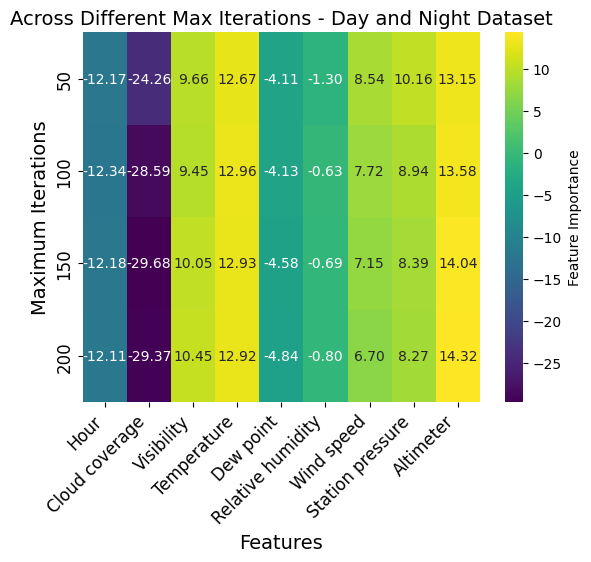

In [6]:
best_mse = float('inf')
best_params = None

max_iter_lst = [50, 100, 150, 200]

feature_importance_matrix = np.zeros((len(max_iter_lst), X_day_night.shape[1]))

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day_night, y_day_night)
    feature_importance_matrix[idx, :] = final_model.coefs_[0].sum(axis=1)

# Plot heatmap for feature importance
feature_names = day_night_solar_df.columns[:9].tolist()

sns.heatmap(feature_importance_matrix, annot=True, cmap='viridis', yticklabels=max_iter_lst,
            xticklabels=feature_names, fmt='.2f', cbar_kws={'label': 'Feature Importance'})
plt.title('Across Different Max Iterations - Day and Night Dataset', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Maximum Iterations', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_night_feature_importance_heatmap_iterations.png'))
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


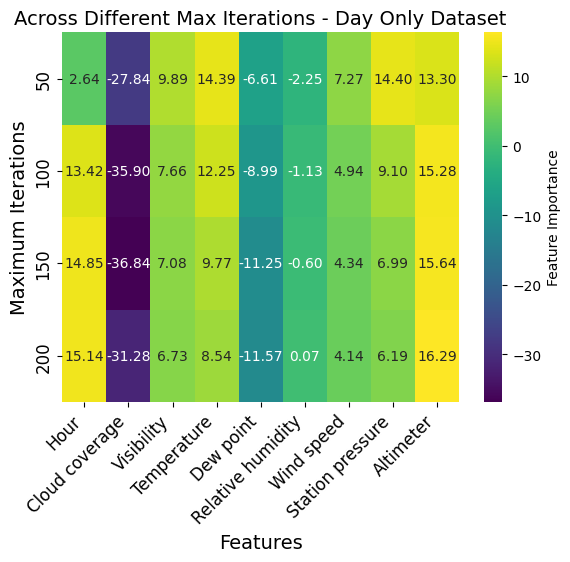

In [7]:
best_mse = float('inf')
best_params = None

max_iter_lst = [50, 100, 150, 200]

feature_importance_matrix = np.zeros((len(max_iter_lst), X_day.shape[1]))

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    final_model.fit(X_day, y_day)
    feature_importance_matrix[idx, :] = final_model.coefs_[0].sum(axis=1)

# Plot heatmap for feature importance
feature_names = day_night_solar_df.columns[:9].tolist()

sns.heatmap(feature_importance_matrix, annot=True, cmap='viridis', yticklabels=max_iter_lst,
            xticklabels=feature_names, fmt='.2f', cbar_kws={'label': 'Feature Importance'})
plt.title('Across Different Max Iterations - Day Only Dataset', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Maximum Iterations', fontsize=14)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.savefig(os.path.join(save_dir, 'day_only_feature_importance_heatmap_iterations.png'))
plt.show()